In [35]:
from netease import netease
from sina_finance import sina
import numpy as np

In [44]:
def mgjzc(code):
    mgjzc=sina.mgjzc(code)
    hp=netease.historical_prices('0'+code)
    mgjzc.drop(mgjzc.tail(1).index, inplace=True)
    mgjzc['每股净资产']=mgjzc['每股净资产'].astype('float')
    mgjzc['股价']=hp['收盘价'].resample('Q').ffill()
    mgjzc['市净率']=mgjzc['股价']/mgjzc['每股净资产']
    mgjzc.sort_index(inplace=True)
    return mgjzc

In [47]:
mgjzc=sina.mgjzc('601328')

In [50]:
mgjzc['每股净资产']

日期
2022-03-31    10.899
2021-12-31    10.636
2021-09-30    10.363
2021-06-30    10.083
2021-03-31    10.186
               ...  
2004-09-30          
2004-06-30          
2003-12-31     1.052
2002-12-31     0.543
2001-12-31     2.038
Name: 每股净资产, Length: 74, dtype: object

<AxesSubplot:xlabel='日期'>

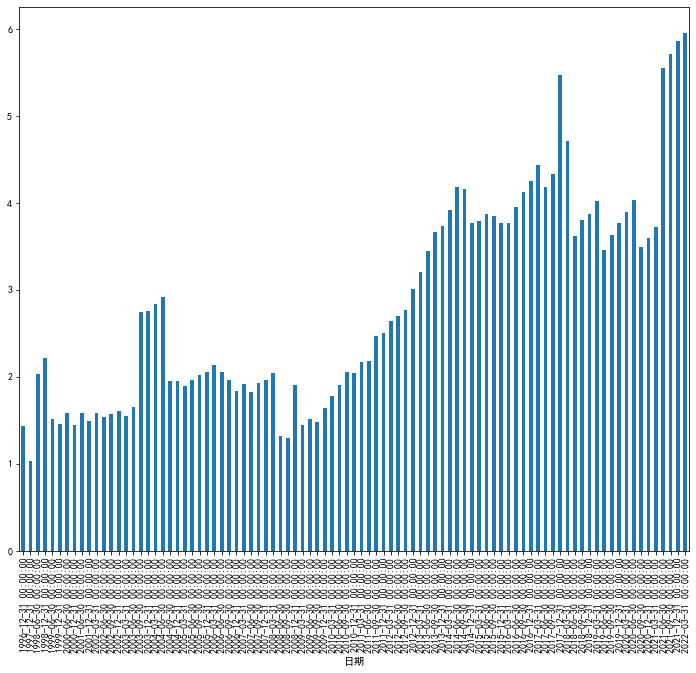

In [37]:
mgjzc=mgjzc('600161')
mgjzc['每股净资产'].plot(figsize=(12,10), kind='bar')

In [41]:
mgjzc

,每股净资产,股价,市净率
日期,,,
1994-12-31,2.860,NaN,NaN
1995-12-31,3.929,NaN,NaN
1996-06-30,6.178,NaN,NaN
1996-12-31,3.707,38.49,10.383059
1997-06-30,4.651,43.26,9.301226
...,...,...,...
2021-03-31,18.772,62.70,3.340081
2021-06-30,16.342,52.10,3.188104
2021-09-30,15.341,38.75,2.525911
